In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import re
import json
from openai import OpenAI

In [2]:
train_df = pd.read_csv("Divar.csv")

C:\Users\USER\AppData\Local\Temp\ipykernel_15732\960344712.py:1: DtypeWarning: Columns (11,27,29,53) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("Divar.csv")


In [3]:
train_df.iloc[:,25:43].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   deed_type                253458 non-null  object
 1   has_business_deed        34679 non-null   object
 2   floor                    541748 non-null  object
 3   rooms_count              845899 non-null  object
 4   total_floors_count       304352 non-null  object
 5   unit_per_floor           302283 non-null  object
 6   has_balcony              506411 non-null  object
 7   has_elevator             541749 non-null  object
 8   has_warehouse            728155 non-null  object
 9   has_parking              728156 non-null  object
 10  construction_year        815828 non-null  object
 11  is_rebuilt               529470 non-null  object
 12  has_water                33444 non-null   object
 13  has_warm_water_provider  379500 non-null  object
 14  has_electricity    

In [4]:
df_subset = pd.concat([train_df.iloc[:, :3],train_df.iloc[:, 6:10],train_df.iloc[:, 25:43]], axis=1)
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 25 columns):
 #   Column                   Non-Null Count    Dtype 
---  ------                   --------------    ----- 
 0   Unnamed: 0               1000000 non-null  int64 
 1   cat2_slug                1000000 non-null  object
 2   cat3_slug                999999 non-null   object
 3   user_type                288882 non-null   object
 4   description              1000000 non-null  object
 5   title                    999946 non-null   object
 6   rent_mode                352994 non-null   object
 7   deed_type                253458 non-null   object
 8   has_business_deed        34679 non-null    object
 9   floor                    541748 non-null   object
 10  rooms_count              845899 non-null   object
 11  total_floors_count       304352 non-null   object
 12  unit_per_floor           302283 non-null   object
 13  has_balcony              506411 non-null   object
 14  has

## deed_type

In [48]:
df_subset.deed_type.value_counts()

deed_type
single_page          194262
written_agreement     31873
other                 20288
multi_page             6466
unselect                569
Name: count, dtype: int64

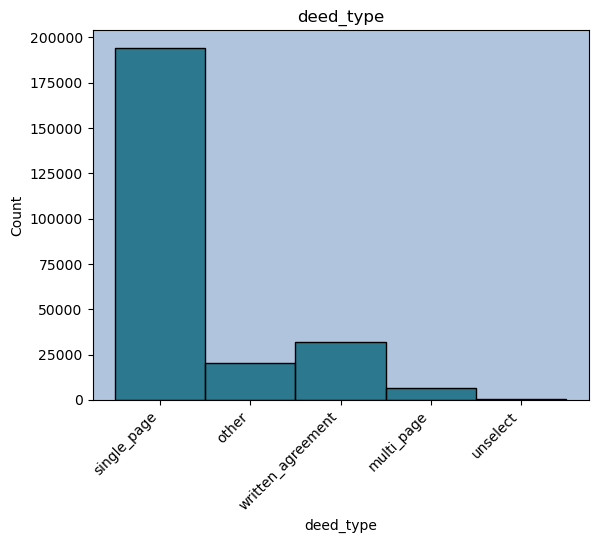

In [49]:
plt.title("deed_type")
sns.histplot(df_subset.deed_type, color="#005f73", bins=100)
plt.xticks(rotation=45, ha='right')
plt.gca().set_facecolor("lightsteelblue")
plt.show()

In [18]:
df_subset.deed_type.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: deed_type
Non-Null Count   Dtype 
--------------   ----- 
253458 non-null  object
dtypes: object(1)
memory usage: 7.6+ MB


## has_business_deed 

In [50]:
df_subset.has_business_deed.value_counts()
df_subset.has_business_deed = df_subset.has_business_deed.map({False:0, True:1})
df_subset.has_business_deed.value_counts()

has_business_deed
0.0    17428
1.0    17251
Name: count, dtype: int64

## rooms_count

In [5]:
df_subset.rooms_count.value_counts()

rooms_count
دو              404050
یک              192083
سه              138633
بدون اتاق        75898
چهار             21371
پنج یا بیشتر     13864
Name: count, dtype: int64

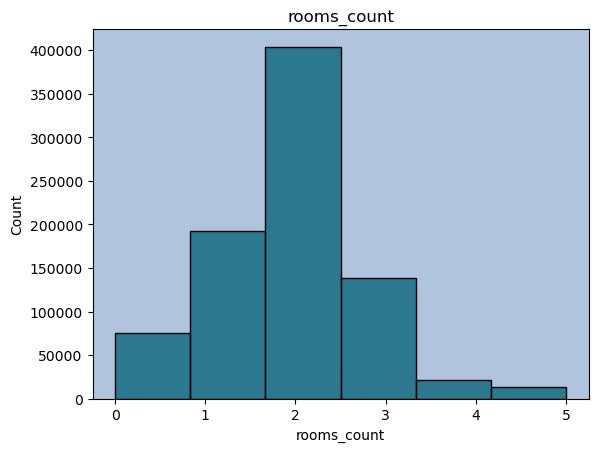

In [5]:
df_subset.rooms_count = df_subset.rooms_count.map({"یک":1, "دو":2, "سه":3, "بدون اتاق":0, "چهار":4, "پنج یا بیشتر":5})
plt.title("rooms_count")
sns.histplot(df_subset.rooms_count, color="#005f73", bins=6)
plt.gca().set_facecolor("lightsteelblue")

In [7]:
print("nan rooms_count:")
for item in df_subset.cat3_slug.unique():
    selected_cat = df_subset[df_subset.cat3_slug == item]["rooms_count"]
    nan_count = selected_cat.isna().sum()
    if len(selected_cat) > 0:
        print(f"nan count for {item} =  {nan_count} - {nan_count*100 / len(selected_cat)} % ")

del selected_cat

nan rooms_count:
nan count for villa =  1 - 0.007752538956508256 % 
nan count for apartment-sell =  6 - 0.0019776851195675463 % 
nan count for apartment-rent =  13 - 0.006135548423636021 % 
nan count for office-rent =  70 - 0.32682790176487064 % 
nan count for shop-sell =  11 - 0.050331731869137496 % 
nan count for plot-old =  133569 - 99.99925132889122 % 
nan count for house-villa-sell =  15 - 0.012320024968583936 % 
nan count for house-villa-rent =  11 - 0.01700732861251121 % 
nan count for shop-rent =  30 - 0.06522731720044354 % 
nan count for industry-agriculture-business-rent =  382 - 4.172583287820863 % 
nan count for office-sell =  0 - 0.0 % 
nan count for industry-agriculture-business-sell =  581 - 4.90253987005316 % 
nan count for presell =  15781 - 100.0 % 
nan count for suite-apartment =  4 - 0.024293956878226542 % 
nan count for partnership =  3622 - 100.0 % 
nan count for workspace =  4 - 0.7421150278293135 % 


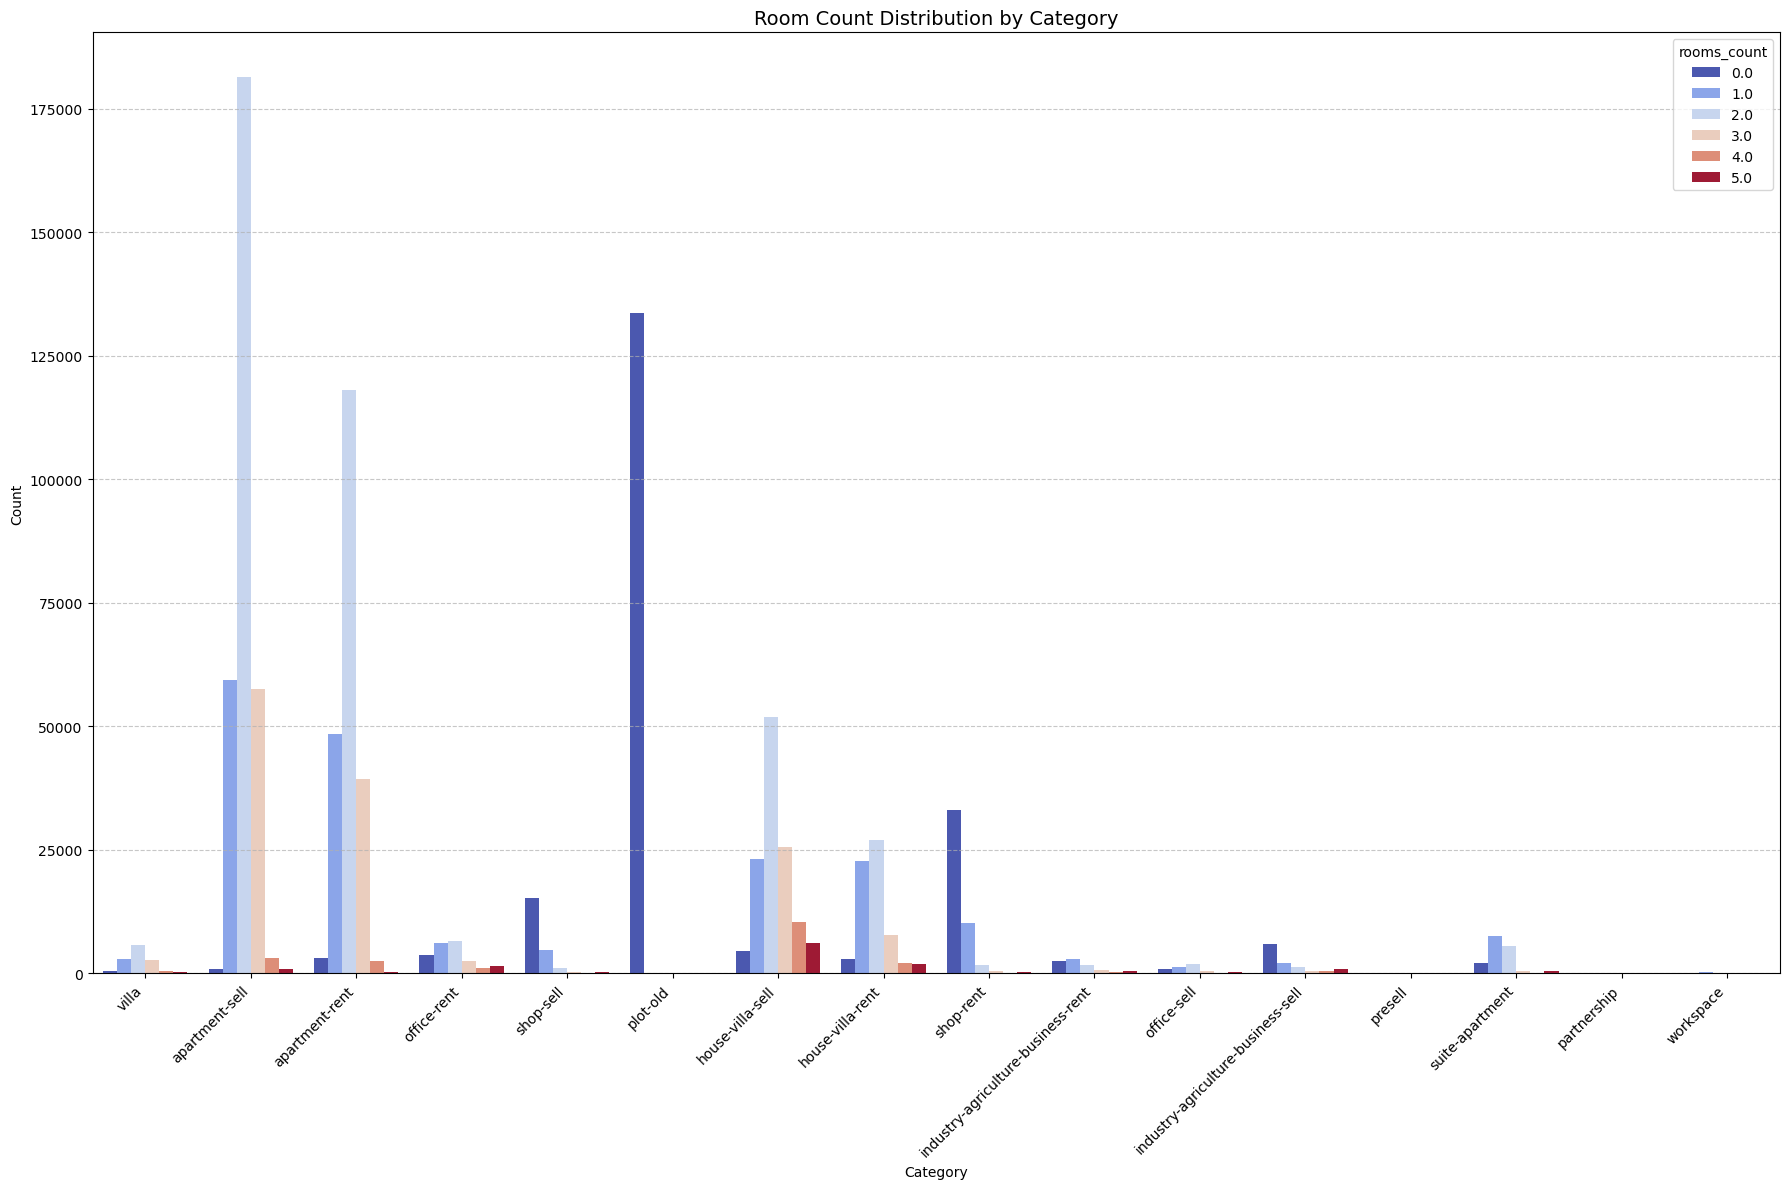

In [9]:
plt.figure(figsize=(18, 12))
sns.countplot(
    data=df_subset,
    x="cat3_slug",
    hue="rooms_count",
    palette="coolwarm")
plt.title("Room Count Distribution by Category", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Category")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
import re
import json
from openai import OpenAI

client = OpenAI(api_key="OPENAI_API_KEY")

def extract_room_count_batch(texts):
    ads_text = "\n\n".join([f"{i+1}. {t}" for i, t in enumerate(texts)])

    prompt = f"""
    The following texts are Persian real estate ads.
    Extract the **number of rooms (bedrooms)** for each ad.

    **Rules:**
    1. Return only a single integer number representing the total rooms (bedrooms).
    2. Convert Persian digits and Persian words (like 'سه', 'دو') to standard digits.
    3. Accept various ways of expressing room count:
        - "۲ خوابه", "دو خواب", "دارای سه اتاق", "سه خوابه", "1 bedroom", etc.
    4. If multiple numbers appear (e.g., “دو طبقه و سه خواب”), use the one referring to rooms or bedrooms.
    5. If the ad doesn't mention room count explicitly, return null.
    6. Ignore unrelated numbers (area, price, floor, phone, etc.).
    7. Return only a **valid JSON array** of integers or nulls in the same order as the ads.

    **Examples:**
    - "آپارتمان دو خوابه ۱۰۰ متری" → 2
    - "واحد سه خوابه در طبقه دوم" → 3
    - "ویلا ۴ خوابه با استخر" → 4
    - " خانه یک طبقه بدون اشاره به خواب" → null
    - "آپارتمان لوکس ۲ اتاق و ۱۰۰ متری" → 2
    - "آپارتمان لوکس سه اطاق و ۱۰۰ متری" → 3
    - "سوئیت بدون اتاق خواب" → 0  
    - "آپارتمان تک‌خوابه نیست، بدون خواب" → 0  
    - "سوئیت ۴۰ متری مبله بدون خواب" → 0  
    - "واحد استودیویی، بدون اتاق مجزا" → 0
    - "آپارتمان تک‌خوابه، بدون خواب" → 0 

    Now process the following ads:
    {ads_text}
    """

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[{"role": "user", "content": prompt}],
        temperature=0)

    raw = response.choices[0].message.content.strip()
    raw_clean = raw.strip('`').replace('json\n', '').replace('```', '').strip()

    try:
        results = json.loads(raw_clean)
        if not isinstance(results, list):
            raise ValueError("Not a list")
    except Exception as e:
        print("Whole null (parse error):", e)
        results = [None] * len(texts)

    return results


persian_numbers = ["صفر","یک","دو","سه","چهار","پنج","شش","هفت","هشت","نه","ده"]


digit_pattern = re.compile(r'[\d۰-۹]')

def has_number_info(text: str) -> bool:
    # Check digits
    if digit_pattern.search(text):
        return True
    # Check Persian number words
    for w in persian_numbers:
        if w in text:
            return True
    return False


In [9]:
categories = ["apartment-sell", "apartment-rent", "office-rent", 
                "office-sell", "shop-sell", "shop-rent", "presell",
                "industry-agriculture-business-rent", 
                "industry-agriculture-business-sell", 
                "suite-apartment", "workspace", "house-villa-sell", "house-villa-rent"]

room_mask = ((df_subset["cat3_slug"].isin(categories)) & (df_subset.rooms_count.isna()))

In [68]:
import tqdm

BATCH_SIZE = 20


rows_to_process = df_subset[room_mask]

if "room_count_ai" not in df_subset.columns:
    df_subset["room_count_ai"] = None


for start in tqdm.tqdm(range(0, len(rows_to_process), BATCH_SIZE)):
    batch_rows = rows_to_process.iloc[start:start+BATCH_SIZE]

    mask_batch = batch_rows.apply(
        lambda row: has_number_info(f"{row['title']} {row['description']}"),
        axis=1)
    batch_rows_filtered = batch_rows[mask_batch]

    texts = [f"{row['title']}. {row['description']}"
        for _, row in batch_rows_filtered.iterrows()]
    
    if not texts:
        continue
    
    room_count_list = extract_room_count_batch(texts)

    for idx, value in zip(batch_rows_filtered.index, room_count_list):
        if value is None:
            df_subset.loc[idx, "room_count_ai"] = np.nan
        elif isinstance(value, list):
            df_subset.loc[idx, "room_count_ai"] = np.nan
        else:
            df_subset.loc[idx, "room_count_ai"] = value

    room_count_list.clear()

100%|██████████| 556/556 [16:28<00:00,  1.78s/it]

Whole null (parse error): Not a list


In [69]:
pd.DataFrame.to_csv(df_subset.room_count_ai, "E:\\AI_Quera\\Real-estate_PricePrediction\\processed data\\room_count_ai_2.csv")

In [ ]:
pd.DataFrame.to_csv(df_subset.room_count_ai, "E:\\AI_Quera\\Real-estate_PricePrediction\\processed data\\room_count_ai_2.csv")

In [7]:
df_subset["room_count_ai"] = pd.read_csv("E:\\AI_Quera\\Real-estate_PricePrediction\\processed data\\room_count_ai.csv")["room_count_ai"]

In [10]:
room_ai_mask = (room_mask & ~(df_subset.room_count_ai.isna()))
print(f"room ai: {room_ai_mask.sum()}")

room ai: 5891


In [11]:
df_subset.loc[room_ai_mask, "rooms_count"] = df_subset.loc[room_ai_mask, "room_count_ai"].values
df_subset.loc[df_subset["rooms_count"] >= 6, "rooms_count"] = np.nan

In [13]:
print("nan rooms_count:")
for item in df_subset.cat3_slug.unique():
    selected_cat = df_subset[df_subset.cat3_slug == item]["rooms_count"]
    nan_count = selected_cat.isna().sum()
    if len(selected_cat) > 0:
        print(f"nan count for {item} =  {nan_count} - {nan_count*100 / len(selected_cat)} % ")

del selected_cat

nan rooms_count:
nan count for villa =  1 - 0.007752538956508256 % 
nan count for apartment-sell =  2 - 0.000659228373189182 % 
nan count for apartment-rent =  10 - 0.0047196526335661695 % 
nan count for office-rent =  67 - 0.31282099168923333 % 
nan count for shop-sell =  11 - 0.050331731869137496 % 
nan count for plot-old =  133569 - 99.99925132889122 % 
nan count for house-villa-sell =  8 - 0.006570679983244766 % 
nan count for house-villa-rent =  10 - 0.015461207829555644 % 
nan count for shop-rent =  28 - 0.06087882938708064 % 
nan count for industry-agriculture-business-rent =  357 - 3.8995084653194976 % 
nan count for office-sell =  0 - 0.0 % 
nan count for industry-agriculture-business-sell =  544 - 4.590329929963716 % 
nan count for presell =  9974 - 63.20258538749129 % 
nan count for suite-apartment =  3 - 0.018220467658669907 % 
nan count for partnership =  3622 - 100.0 % 
nan count for workspace =  4 - 0.7421150278293135 % 


In [14]:
df_subset.rooms_count.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: rooms_count
Non-Null Count   Dtype  
--------------   -----  
851789 non-null  float64
dtypes: float64(1)
memory usage: 7.6 MB


In [15]:
# not_applicable_room_cat = [
#     "plot-old",             
#     "industry-agriculture-business-rent",
#     "industry-agriculture-business-sell",
#     "shop-sell", "shop-rent",
#     "partnership", 
#     "workspace"]

df_subset.loc[(df_subset.rooms_count.isna()), "rooms_count"] = -1

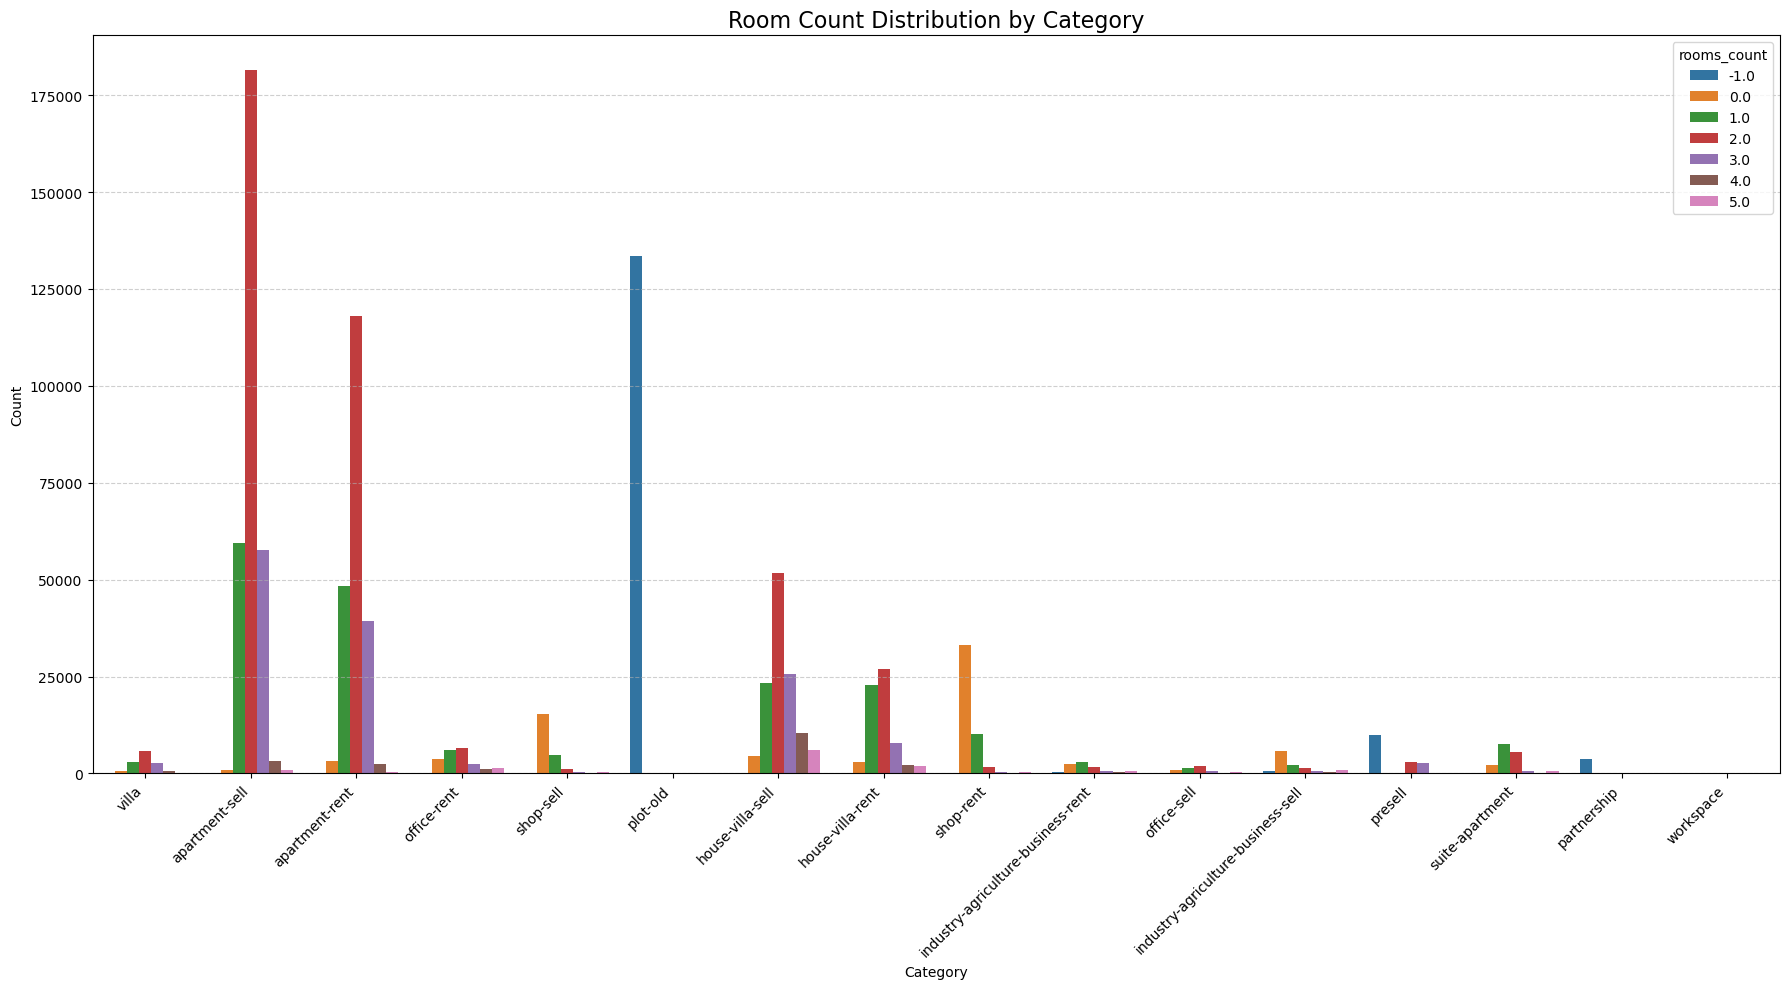

In [16]:
plt.figure(figsize=(18, 10))
sns.countplot(
    data=df_subset,
    x="cat3_slug",
    hue=df_subset["rooms_count"].astype("category"),  # force categorical
    palette="tab10"  # or "tab10", "Set2", "Paired" for distinct hues
)
plt.title("Room Count Distribution by Category", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Category")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [32]:
df_subset["rooms_count"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: rooms_count
Non-Null Count    Dtype  
--------------    -----  
1000000 non-null  float64
dtypes: float64(1)
memory usage: 7.6 MB


In [33]:
pd.DataFrame.to_csv(df_subset.rooms_count, "E:\\AI_Quera\\Real-estate_PricePrediction\\processed data\\rooms_count.csv")

## floor

In [19]:
df_subset["floor"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: floor
Non-Null Count   Dtype 
--------------   ----- 
541748 non-null  object
dtypes: object(1)
memory usage: 7.6+ MB


In [20]:
print("nan floor:")
for item in df_subset.cat3_slug.unique():
    selected_cat = df_subset[df_subset.cat3_slug == item]["floor"]
    nan_count = selected_cat.isna().sum()
    if len(selected_cat) > 0:
        print(f"nan count for {item} =  {nan_count} - {nan_count*100 / len(selected_cat)} % ")

del selected_cat

nan floor:
nan count for villa =  12899 - 100.0 % 
nan count for apartment-sell =  8 - 0.002636913492756728 % 
nan count for apartment-rent =  13 - 0.006135548423636021 % 
nan count for office-rent =  70 - 0.32682790176487064 % 
nan count for shop-sell =  21855 - 100.0 % 
nan count for plot-old =  133570 - 100.0 % 
nan count for house-villa-sell =  121753 - 100.0 % 
nan count for house-villa-rent =  64678 - 100.0 % 
nan count for shop-rent =  45993 - 100.0 % 
nan count for industry-agriculture-business-rent =  9155 - 100.0 % 
nan count for office-sell =  0 - 0.0 % 
nan count for industry-agriculture-business-sell =  11850 - 99.99156189351109 % 
nan count for presell =  15781 - 100.0 % 
nan count for suite-apartment =  16465 - 100.0 % 
nan count for partnership =  3622 - 100.0 % 
nan count for workspace =  539 - 100.0 % 


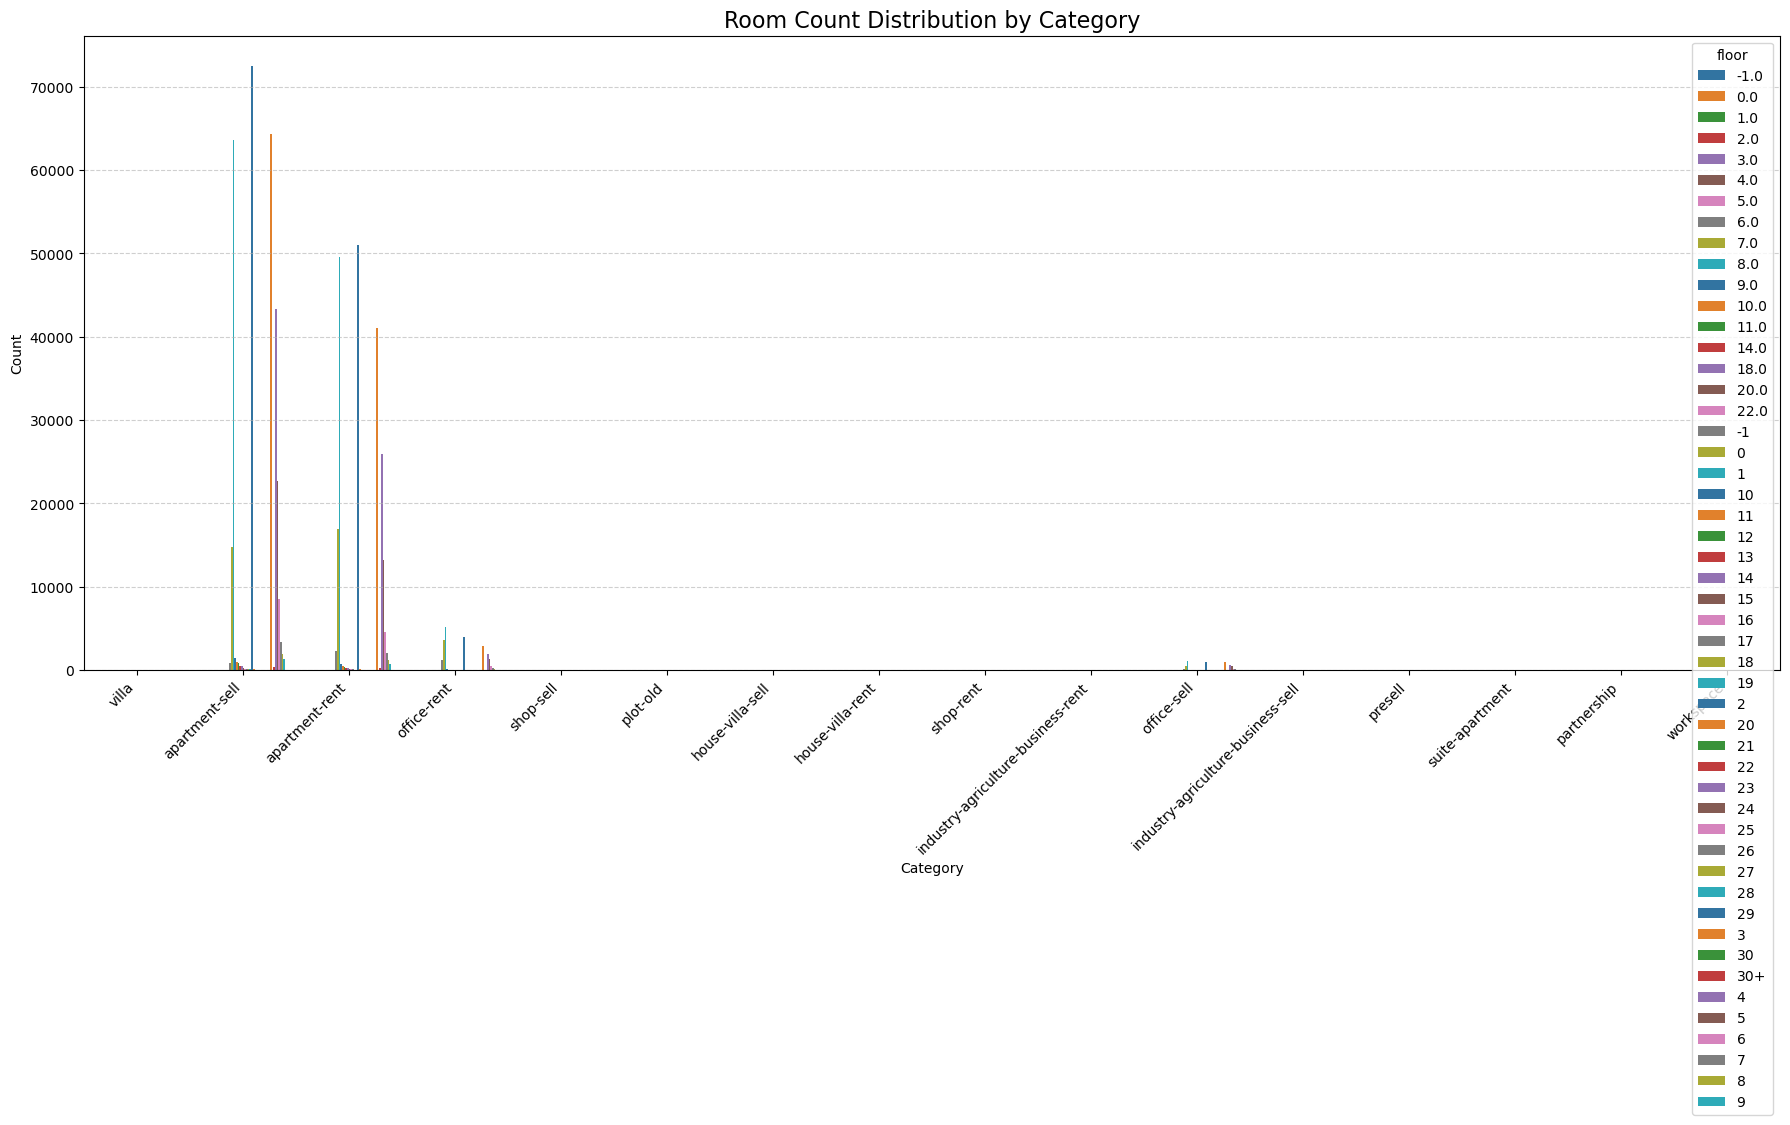

In [ ]:
plt.figure(figsize=(18, 10))
sns.countplot(
    data=df_subset,
    x="cat3_slug",
    hue=df_subset["floor"].astype("category"),
    palette="tab10"  # or "tab10", "Set2", "Paired"
)
plt.title("floor Distribution by Category", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Category")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
def object_to_int(val):
    if pd.isna(val):
        return np.nan
    val = str(val).strip()
    
    if val.endswith("+"):
        return int(val.replace("+", ""))
    
    if re.match(r"more[_ ]than[_ ](\d+)", val):
        return int(re.findall(r"\d+", val)[0]) + 1 
    
    
    
    if val == "unselect":
        return -1
    
    return int(float(val))

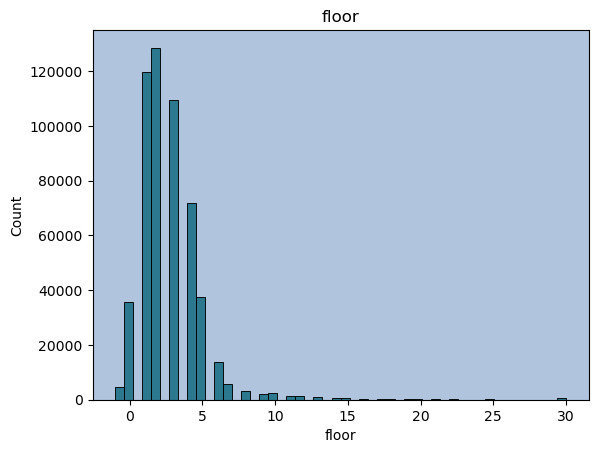

In [22]:
df_subset.floor = df_subset.floor.apply(object_to_int)
plt.title("floor")
sns.histplot(df_subset.floor, color="#005f73", bins=50)
plt.gca().set_facecolor("lightsteelblue")

In [24]:
df_subset["ps_floor_ai"] = pd.read_csv("ps_floor_ai.csv")["ps_floor_ai"]
ps_ai_mask = ~(df_subset.ps_floor_ai.isna())
df_subset.loc[ps_ai_mask, "floor"] = df_subset.loc[ps_ai_mask, "ps_floor_ai"].values

In [25]:
df_subset.floor.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: floor
Non-Null Count   Dtype  
--------------   -----  
545670 non-null  float64
dtypes: float64(1)
memory usage: 7.6 MB


In [26]:
zero_floor_cat = ["plot-old"]
one_floor_cat = ["villa","house-villa-sell","house-villa-rent",
    "industry-agriculture-business-rent","industry-agriculture-business-sell",
    "shop-sell","shop-rent"]
not_applicable_floor_cat = ["partnership", "workspace"]

# Ground-level categories
df_subset.loc[(df_subset["cat3_slug"].isin(zero_floor_cat)) & (df_subset.floor.isna()), "floor"] = 0
df_subset.loc[(df_subset["cat3_slug"].isin(one_floor_cat)) & (df_subset.floor.isna()), "floor"] = 1

# not applicable
df_subset.loc[(df_subset["cat3_slug"].isin(not_applicable_floor_cat)) & (df_subset.floor.isna()), "floor"] = -1

In [27]:
df_subset.floor.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: floor
Non-Null Count   Dtype  
--------------   -----  
971584 non-null  float64
dtypes: float64(1)
memory usage: 7.6 MB


In [29]:
df_subset["sa_floor_ai"] = pd.read_csv("sa_floor_ai.csv")["sa_floor_ai"]
sa_ai_mask = ~(df_subset["sa_floor_ai"].isna())
df_subset.loc[sa_ai_mask, "floor"] = df_subset.loc[sa_ai_mask, "sa_floor_ai"].values

In [30]:
df_subset.floor.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: floor
Non-Null Count   Dtype  
--------------   -----  
973428 non-null  float64
dtypes: float64(1)
memory usage: 7.6 MB


In [ ]:
import re
import json
from openai import OpenAI

client = OpenAI(api_key="OPENAI_API_KEY")

def extract_presell_floor_batch(texts):
    ads_text = "\n\n".join([f"{i+1}. {t}" for i, t in enumerate(texts)])

    prompt = f"""
    The following texts are Persian real estate ads from the **presell** category.
    Extract the *floor number* for each ad.

    **Rules:**
    1. Return only one integer per ad representing the floor number.
    2. Convert all Persian digits and Persian words to English digits.
    3. Handle words such as "طبقه اول", "طبقه سوم", "floor 2", "در طبقه ۵", etc.
    4. Ignore unrelated numbers like area, price, unit count, or address.
    5. If it's explicitly ground floor ("همکف"), return 0.
    6. If it's mentioned as "پیلوت" (pilot floor), return 0.
    7. If no floor number is mentioned, return null.
    8. Return only a valid JSON array of integers or nulls in the same order as the ads.

    **Examples:**
    - "پیش فروش آپارتمان در طبقه ۳" → 3
    - "واحد همکف پیش فروش" → 0
    - "پیش فروش واحد در پیلوت" → 0
    - "پیش فروش طبقه دوم" → 2
    - "پیش فروش آپارتمان ۱۵۰ متری بدون ذکر طبقه" → null
    - "پیش فروش آپارتمان ۱۵۰ متری" → null
    - "ویلا همکف ۱۲۰ متری در شمال" → 1
    - "ویلا دوبلکس ۲۵۰ متری در زمین ۴۰۰ متری" → 1
    - "ویلا تریپلکس با استخر" → 1

    Now process the following ads:
    {ads_text}
    """

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[{"role": "user", "content": prompt}],
        temperature=0,
    )

    raw = response.choices[0].message.content.strip()
    raw_clean = raw.strip('`').replace('json\n', '')

    try:
        results = json.loads(raw_clean)
        if not isinstance(results, list):
            raise ValueError("Not a list")
    except Exception as e:
        print("Whole null:", e)
        results = [None] * len(texts)

    return results


persian_numbers = [
    "یک","دو","سه","چهار","پنج","شش","هفت","هشت","نه","ده",
    "یازده","دوازده","سیزده","چهارده","پانزده","شانزده",
    "هفده","هجده","نوزده","بیست","سی","چهل","پنجاه"]


digit_pattern = re.compile(r'[\d۰-۹]')

def has_number_info(text: str) -> bool:
    # Check digits
    if digit_pattern.search(text):
        return True
    # Check Persian number words
    for w in persian_numbers:
        if w in text:
            return True
    return False


In [32]:
ps_floor_mask = ((df_subset.cat3_slug == "presell") & (df_subset.floor.isna()))

In [34]:
import tqdm

BATCH_SIZE = 20

rows_to_process = df_subset[ps_floor_mask]

if "ps_floor_ai" not in df_subset.columns:
    df_subset["ps_floor_ai"] = np.nan


for start in tqdm.tqdm(range(0, len(rows_to_process), BATCH_SIZE)):
    batch_rows = rows_to_process.iloc[start:start+BATCH_SIZE]

    mask_batch = batch_rows.apply(
        lambda row: has_number_info(f"{row['title']} {row['description']}"), axis=1)
    batch_rows_filtered = batch_rows[mask_batch]

    texts = [f"{row['title']}. {row['description']}"
        for _, row in batch_rows_filtered.iterrows()]
    
    if not texts:
        continue
    
    ps_floor_list = extract_presell_floor_batch(texts)

    for idx, val in zip(batch_rows_filtered.index, ps_floor_list):
        if val is None or isinstance(val, list):
            df_subset.loc[idx, "ps_floor_ai"] = np.nan
        else:
            df_subset.loc[idx, "ps_floor_ai"] = val

    ps_floor_list.clear()

100%|██████████| 790/790 [23:14<00:00,  1.76s/it]

Whole null: Not a list


In [35]:
df_subset.ps_floor_ai.info()
pd.DataFrame.to_csv(df_subset.ps_floor_ai, "E:\\AI_Quera\\Real-estate_PricePrediction\\processed data\\ps_floor_ai.csv")

<class 'pandas.core.series.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: ps_floor_ai
Non-Null Count  Dtype  
--------------  -----  
3922 non-null   float64
dtypes: float64(1)
memory usage: 7.6 MB


In [ ]:
client = OpenAI(api_key="OPENAI_API_KEY")

def extract_suite_floor_batch(texts):
    ads_text = "\n\n".join([f"{i+1}. {t}" for i, t in enumerate(texts)])

    prompt = f"""
    The following texts are Persian real estate ads from the **suite-apartment** category.
    Extract the *floor number* for each ad.

    **Rules:**
    1. Return only one integer per ad representing the floor number.
    2. Convert all Persian digits and Persian words to English digits.
    3. Handle patterns such as "طبقه اول", "طبقه سوم", "floor 2", "در طبقه ۵", "منفی یک", "زیرزمین", etc.
    4. Ignore unrelated numbers (area, price, phone, address, etc.).
    5. If it's explicitly ground floor ("همکف"), return 0.
    6. If it's "پیلوت" (pilot floor), return 0.
    7. Suites are usually single-floor units — if it’s unclear, return null.
    8. If the text describes a duplex ("دوبلکس") or triplex ("تریپلکس"), return 1.
    9. If no floor number is mentioned, return null.
    10. Return only a valid JSON array of integers or nulls in the same order as the ads.

    **Examples:**
    - "اجاره سوئیت در طبقه دوم" → 2
    - "سوئیت همکف مبله" → 0
    - "سوئیت مبله در پیلوت" → 0
    - "سوئیت دوبلکس لوکس" → 1
    - "سوئیت طبقه سوم با تراس" → 3
    - "سوئیت ۵۰ متری" → null
    - "سوئیت در طبقه منفی یک" → -1
    - "سوئیت در زیرزمین" → -1
    - "طبقه زیرهمکف سوئیت" → -1

    Now process the following ads:
    {ads_text}

    Return only the JSON array, with no explanations or extra text.
    """

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[{"role": "user", "content": prompt}],
        temperature=0
    )

    raw = response.choices[0].message.content.strip()
    raw_clean = raw.strip('`').replace('json\n', '').replace('−', '-')

    try:
        results = json.loads(raw_clean)
        if not isinstance(results, list) or len(results) != len(texts):
            raise ValueError("Invalid output format")
    except Exception as e:
        print("Whole null:", e)
        results = [None] * len(texts)

    return results


In [77]:
sa_mask = (df_subset.cat3_slug == "suite-apartment") & (df_subset.floor.isna())

In [78]:
import tqdm

BATCH_SIZE = 20

rows_to_process = df_subset[sa_mask]

if "sa_floor_ai" not in df_subset.columns:
    df_subset["sa_floor_ai"] = np.nan


for start in tqdm.tqdm(range(0, len(rows_to_process), BATCH_SIZE)):
    batch_rows = rows_to_process.iloc[start:start+BATCH_SIZE]

    mask_batch = batch_rows.apply(
        lambda row: has_number_info(f"{row['title']} {row['description']}"),
        axis=1)
    batch_rows_filtered = batch_rows[mask_batch]

    texts = [f"{row['title']}. {row['description']}"
        for _, row in batch_rows_filtered.iterrows()]
    
    if not texts:
        continue
    
    sa_floor_list = extract_suite_floor_batch(texts)

    for idx, val in zip(batch_rows_filtered.index, sa_floor_list):
        if val is None or isinstance(val, list):
            df_subset.loc[idx, "sa_floor_ai"] = np.nan
        else:
            df_subset.loc[idx, "sa_floor_ai"] = val

    sa_floor_list.clear()

100%|██████████| 824/824 [21:21<00:00,  1.56s/it]


In [79]:
df_subset.sa_floor_ai.info()
pd.DataFrame.to_csv(df_subset.sa_floor_ai, "E:\\AI_Quera\\Real-estate_PricePrediction\\processed data\\sa_floor_ai.csv")

<class 'pandas.core.series.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: sa_floor_ai
Non-Null Count  Dtype  
--------------  -----  
1844 non-null   float64
dtypes: float64(1)
memory usage: 7.6 MB


In [31]:
pd.DataFrame.to_csv(df_subset.floor, "E:\\AI_Quera\\Real-estate_PricePrediction\\processed data\\floor.csv")

In [189]:
df_subset.floor = df_subset.floor.fillna(-1)

## has_elevator

In [34]:
df_subset.has_elevator.value_counts()

has_elevator
True     365148
False    176601
Name: count, dtype: int64

In [35]:
print("nan has_elevator:")
for item in df_subset.cat3_slug.unique():
    selected_cat = df_subset[df_subset.cat3_slug == item]["has_elevator"]
    nan_count = selected_cat.isna().sum()
    if len(selected_cat) > 0:
        print(f"nan count for {item} =  {nan_count} - {nan_count*100 / len(selected_cat)} % ")

del selected_cat

nan has_elevator:
nan count for villa =  12899 - 100.0 % 
nan count for apartment-sell =  7 - 0.0023072993061621374 % 
nan count for apartment-rent =  13 - 0.006135548423636021 % 
nan count for office-rent =  70 - 0.32682790176487064 % 
nan count for shop-sell =  21855 - 100.0 % 
nan count for plot-old =  133570 - 100.0 % 
nan count for house-villa-sell =  121753 - 100.0 % 
nan count for house-villa-rent =  64678 - 100.0 % 
nan count for shop-rent =  45993 - 100.0 % 
nan count for industry-agriculture-business-rent =  9155 - 100.0 % 
nan count for office-sell =  0 - 0.0 % 
nan count for industry-agriculture-business-sell =  11850 - 99.99156189351109 % 
nan count for presell =  15781 - 100.0 % 
nan count for suite-apartment =  16465 - 100.0 % 
nan count for partnership =  3622 - 100.0 % 
nan count for workspace =  539 - 100.0 % 


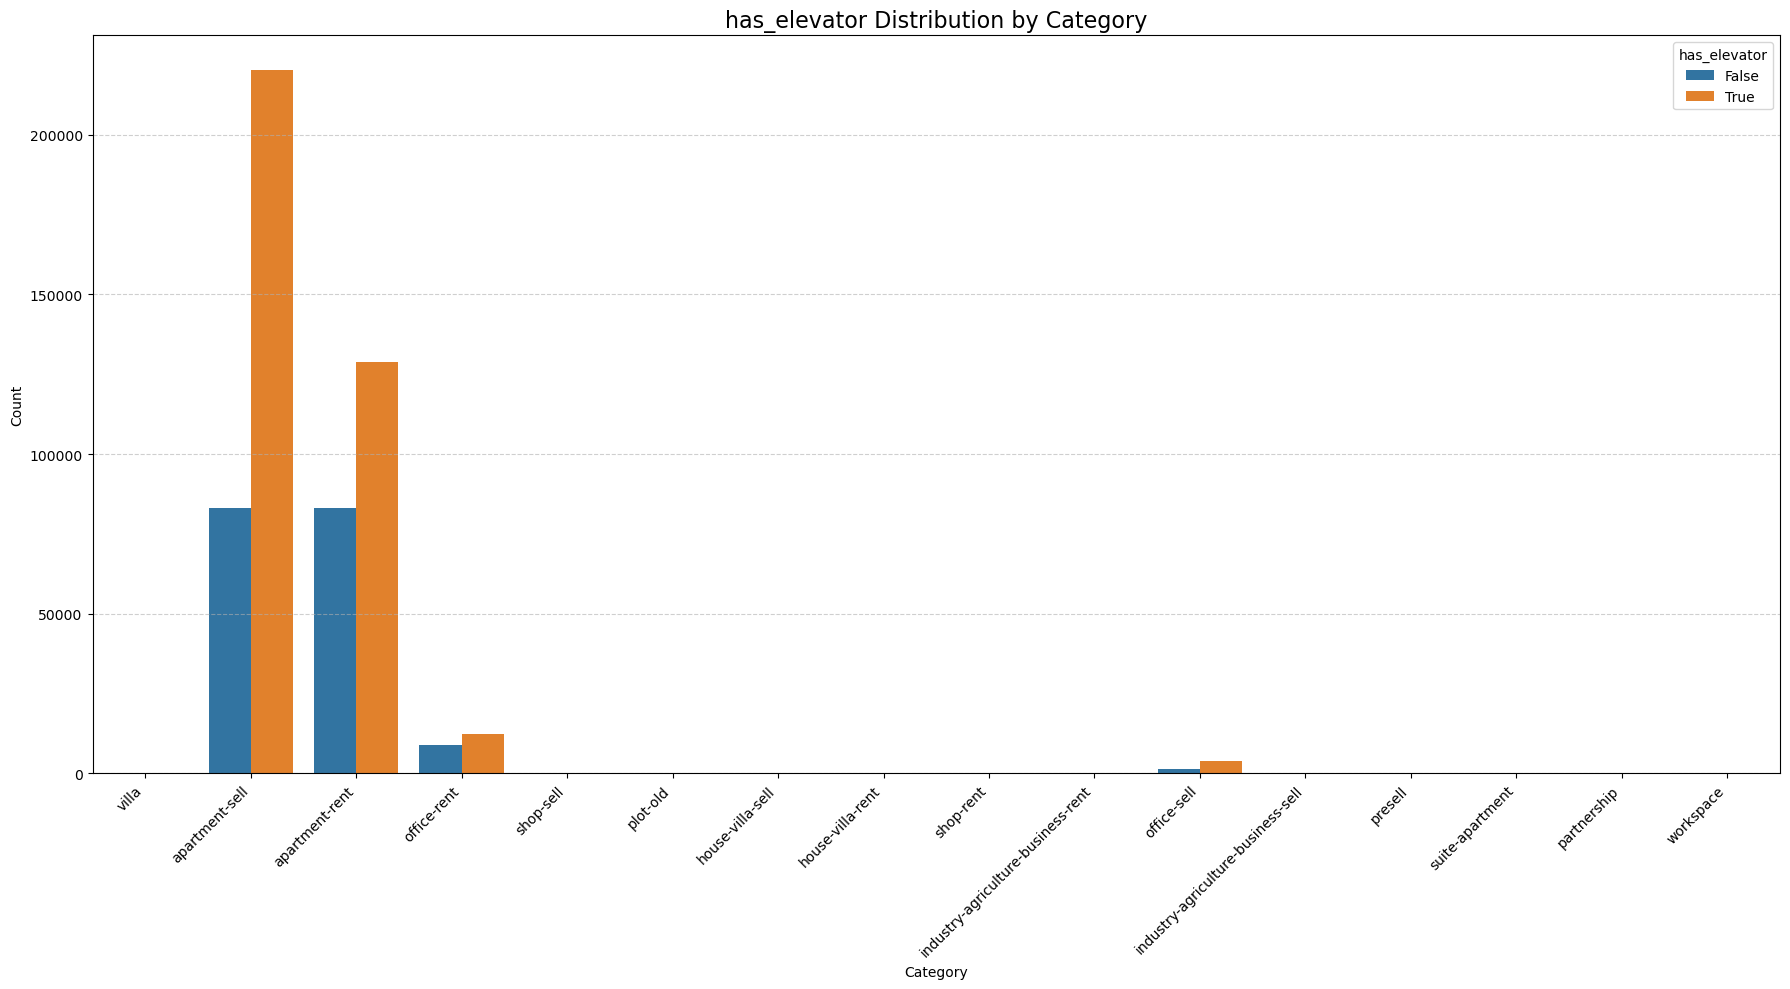

In [36]:
plt.figure(figsize=(18, 10))
sns.countplot(
    data=df_subset,
    x="cat3_slug",
    hue=df_subset["has_elevator"].astype("category"),
    palette="tab10"  # or "tab10", "Set2", "Paired" for distinct hues
)
plt.title("has_elevator Distribution by Category", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Category")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [37]:
df_subset.has_elevator = df_subset.has_elevator.map({False:0, True:1})
df_subset.has_elevator.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: has_elevator
Non-Null Count   Dtype  
--------------   -----  
541749 non-null  float64
dtypes: float64(1)
memory usage: 7.6 MB


In [38]:
df_subset["elevator_ai"] = pd.read_csv("elevator_ai.csv")["elevator_ai"]
elevator_ai_mask = ~(df_subset["elevator_ai"].isna())
df_subset.loc[elevator_ai_mask, "has_elevator"] = df_subset.loc[elevator_ai_mask, "elevator_ai"].values
df_subset.has_elevator.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: has_elevator
Non-Null Count   Dtype  
--------------   -----  
546312 non-null  float64
dtypes: float64(1)
memory usage: 7.6 MB


In [39]:
not_applicable_elevator_cat = ["villa", "house-villa-sell", "house-villa-rent",
    "industry-agriculture-business-rent", "industry-agriculture-business-sell",
    "shop-sell", "shop-rent", "plot-old", "presell", "suite-apartment", "partnership", "workspace"]

df_subset.loc[(df_subset["cat3_slug"].isin(not_applicable_elevator_cat)) &
    (df_subset["has_elevator"].isna()), "has_elevator"] = -1

In [40]:
df_subset.has_elevator.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: has_elevator
Non-Null Count   Dtype  
--------------   -----  
999911 non-null  float64
dtypes: float64(1)
memory usage: 7.6 MB


In [41]:
print("nan has_elevator:")
for item in df_subset.cat3_slug.unique():
    selected_cat = df_subset[df_subset.cat3_slug == item]["has_elevator"]
    nan_count = selected_cat.isna().sum()
    if len(selected_cat) > 0:
        print(f"nan count for {item} =  {nan_count} - {nan_count*100 / len(selected_cat)} % ")

del selected_cat

nan has_elevator:
nan count for villa =  0 - 0.0 % 
nan count for apartment-sell =  6 - 0.0019776851195675463 % 
nan count for apartment-rent =  13 - 0.006135548423636021 % 
nan count for office-rent =  69 - 0.3221589317396582 % 
nan count for shop-sell =  0 - 0.0 % 
nan count for plot-old =  0 - 0.0 % 
nan count for house-villa-sell =  0 - 0.0 % 
nan count for house-villa-rent =  0 - 0.0 % 
nan count for shop-rent =  0 - 0.0 % 
nan count for industry-agriculture-business-rent =  0 - 0.0 % 
nan count for office-sell =  0 - 0.0 % 
nan count for industry-agriculture-business-sell =  0 - 0.0 % 
nan count for presell =  0 - 0.0 % 
nan count for suite-apartment =  0 - 0.0 % 
nan count for partnership =  0 - 0.0 % 
nan count for workspace =  0 - 0.0 % 


In [ ]:
import re
import json
from openai import OpenAI

client = OpenAI(api_key="OPENAI_API_KEY")

def extract_elevator_batch(texts):
    ads_text = "\n\n".join([f"{i+1}. {t}" for i, t in enumerate(texts)])

    prompt = f"""
    The following texts are Persian real estate ads from various categories (e.g., presell, suite-apartment, apartment-sell, etc.).
    For each ad, determine whether it **mentions an elevator**.

    **Rules:**
    1. Return 1 if the ad clearly mentions the presence of an elevator (e.g., "آسانسور دارد", "با آسانسور", "دارای آسانسور", "elevator available").
    2. Return 0 if the ad clearly says there is **no elevator** (e.g., "بدون آسانسور", "فاقد آسانسور", "آسانسور ندارد").
    3. If there is no mention or it’s unclear, return null.
    4. Ignore unrelated amenities (like parking, storage, or balcony).
    5. Return only a valid JSON array of 1, 0, or null in the same order as the ads.

    **Examples:**
    - "آپارتمان دو خوابه با آسانسور و پارکینگ" → 1
    - "واحد نوساز بدون آسانسور" → 0
    - "آپارتمان طبقه سوم آسانسور ندارد" → 0
    - "سوئیت مبله با آسانسور" → 1
    - "خانه ویلایی همکف بدون اشاره به آسانسور" → null
    - "ویلا دوبلکس با استخر" → null
    - "آپارتمان دارای آسانسور و انباری" → 1
    - "آپارتمان فاقد آسانسور" → 0

    Now process the following ads:
    {ads_text}

    Return only the JSON array, with no explanations or extra text.
    """

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[{"role": "user", "content": prompt}],
        temperature=0)

    raw = response.choices[0].message.content.strip()
    raw_clean = raw.strip('`').replace('json\n', '')
    raw_clean = raw_clean.strip()

    try:
        results = json.loads(raw_clean)
        if not isinstance(results, list) or len(results) != len(texts):
            raise ValueError("Invalid output format")
    except Exception as e:
        print("Whole null:", e)
        results = [None] * len(texts)

    return results


In [10]:
elev_mask = df_subset["has_elevator"].isna() & (df_subset["cat3_slug"] != "partnership")

In [13]:
import tqdm

BATCH_SIZE = 10
rows_to_process = df_subset[elev_mask]

if "elevator_ai" not in df_subset.columns:
    df_subset["elevator_ai"] = np.nan


for start in tqdm.tqdm(range(0, len(rows_to_process), BATCH_SIZE)):
    batch_rows = rows_to_process.iloc[start:start+BATCH_SIZE]

    texts = [f"{row['title']}. {row['description']}"
        for _, row in batch_rows.iterrows()]
    
    if not texts:
        continue
    
    elevator_ai_list = extract_elevator_batch(texts)

    for idx, val in zip(batch_rows.index, elevator_ai_list):
        if val is None or isinstance(val, list):
            df_subset.loc[idx, "elevator_ai"] = np.nan
        else:
            df_subset.loc[idx, "elevator_ai"] = val

    elevator_ai_list.clear()

 14%|█▎        | 446/3288 [09:35<1:08:29,  1.45s/it]

Whole null: Invalid output format


 18%|█▊        | 591/3288 [12:13<49:42,  1.11s/it]  

Whole null: Invalid output format


 46%|████▋     | 1525/3288 [29:03<25:43,  1.14it/s]  

Whole null: Invalid output format


 91%|█████████ | 2997/3288 [57:38<04:40,  1.04it/s]  

Whole null: Invalid output format


 92%|█████████▏| 3031/3288 [58:15<05:06,  1.19s/it]

Whole null: Invalid output format


 93%|█████████▎| 3073/3288 [59:01<03:40,  1.03s/it]

Whole null: Invalid output format


100%|██████████| 3288/3288 [1:03:04<00:00,  1.15s/it]


In [14]:
df_subset.elevator_ai.info()
pd.DataFrame.to_csv(df_subset.elevator_ai, "E:\\AI_Quera\\Real-estate_PricePrediction\\processed data\\elevator_ai.csv")

<class 'pandas.core.series.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: elevator_ai
Non-Null Count  Dtype  
--------------  -----  
4563 non-null   float64
dtypes: float64(1)
memory usage: 7.6 MB


In [42]:
pd.DataFrame.to_csv(df_subset.has_elevator, "E:\\AI_Quera\\Real-estate_PricePrediction\\processed data\\has_elevator.csv")

## has_warehouse

In [112]:
df_subset.has_warehouse.value_counts()

has_warehouse
True     582313
False    145842
Name: count, dtype: int64

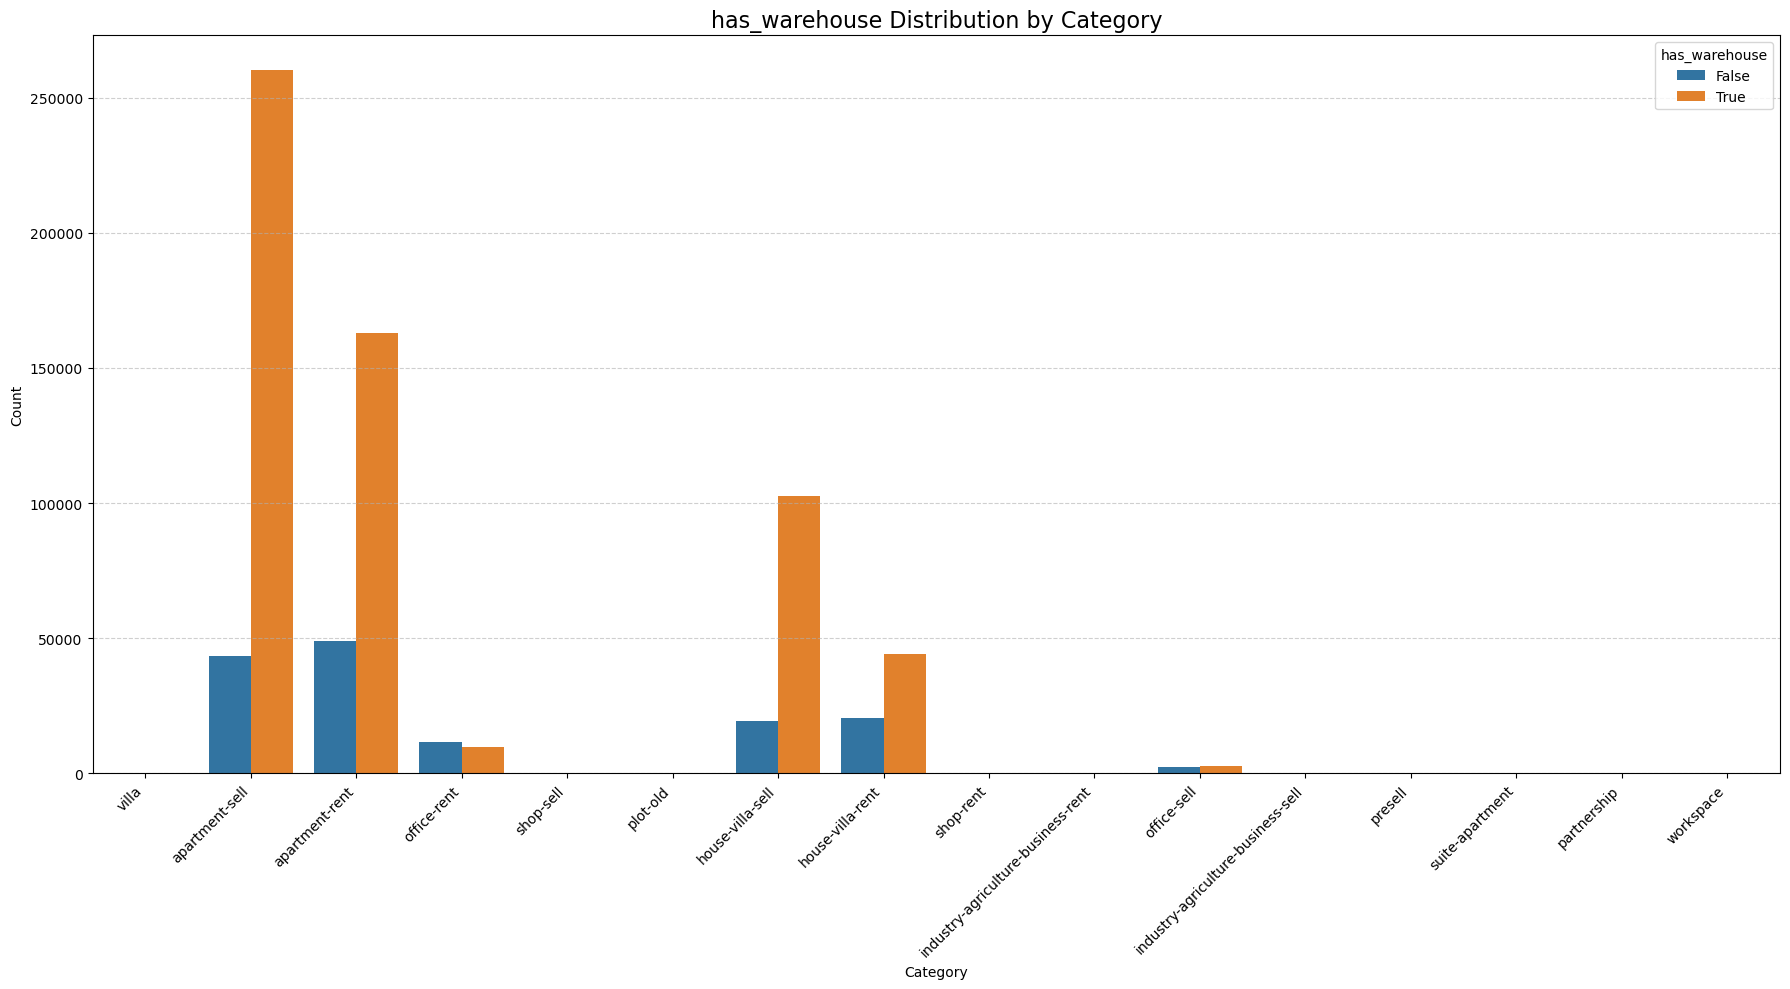

In [114]:
plt.figure(figsize=(18, 10))
sns.countplot(
    data=df_subset,
    x="cat3_slug",
    hue=df_subset["has_warehouse"].astype("category"),  # force categorical
    palette="tab10"  # or "tab10", "Set2", "Paired" for distinct hues
)
plt.title("has_warehouse Distribution by Category", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Category")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [115]:
print("nan has_warehouse:")
for item in df_subset.cat3_slug.unique():
    selected_cat = df_subset[df_subset.cat3_slug == item]["has_warehouse"]
    nan_count = selected_cat.isna().sum()
    if len(selected_cat) > 0:
        print(f"nan count for {item} =  {nan_count} - {nan_count*100 / len(selected_cat)} % ")

del selected_cat

nan has_warehouse:
nan count for villa =  12899 - 100.0 % 
nan count for apartment-sell =  7 - 0.0023072993061621374 % 
nan count for apartment-rent =  13 - 0.006135548423636021 % 
nan count for office-rent =  70 - 0.32682790176487064 % 
nan count for shop-sell =  21855 - 100.0 % 
nan count for plot-old =  133569 - 99.99925132889122 % 
nan count for house-villa-sell =  15 - 0.012320024968583936 % 
nan count for house-villa-rent =  11 - 0.01700732861251121 % 
nan count for shop-rent =  45993 - 100.0 % 
nan count for industry-agriculture-business-rent =  9155 - 100.0 % 
nan count for office-sell =  0 - 0.0 % 
nan count for industry-agriculture-business-sell =  11850 - 99.99156189351109 % 
nan count for presell =  15781 - 100.0 % 
nan count for suite-apartment =  16465 - 100.0 % 
nan count for partnership =  3622 - 100.0 % 
nan count for workspace =  539 - 100.0 % 


In [116]:
df_subset.has_warehouse = df_subset.has_warehouse.map({False:0, True:1})
df_subset.has_warehouse.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: has_warehouse
Non-Null Count   Dtype  
--------------   -----  
728155 non-null  float64
dtypes: float64(1)
memory usage: 7.6 MB


In [117]:
not_applicable_warehouse_cat = ["plot-old","industry-agriculture-business-sell",
    "industry-agriculture-business-rent", "suite-apartment", "workspace", "partnership"]

df_subset.loc[(df_subset["cat3_slug"].isin(not_applicable_warehouse_cat)) & 
    (df_subset["has_warehouse"].isna()), "has_warehouse"] = -1

df_subset.has_warehouse.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: has_warehouse
Non-Null Count   Dtype  
--------------   -----  
903355 non-null  float64
dtypes: float64(1)
memory usage: 7.6 MB


In [ ]:
client = OpenAI(api_key="OPENAI_API_KEY")

def extract_warehouse_batch(texts):
    ads_text = "\n\n".join([f"{i+1}. {t}" for i, t in enumerate(texts)])

    prompt = f"""
    The following texts are Persian real estate ads from various categories (e.g., villa, apartment, office, shop, etc.).
    For each ad, determine whether it **mentions a warehouse/storage (انباری)**.

    **Rules:**
    1. Return 1 if the ad clearly mentions the presence of a warehouse/storage (e.g., "انباری دارد", "با انباری", "دارای انباری", "storage available").
    2. Return 0 if the ad clearly says there is **no warehouse/storage** (e.g., "بدون انباری", "فاقد انباری", "انباری ندارد").
    3. If there is no mention or it’s unclear, return null.
    4. Ignore unrelated amenities (like parking, elevator, balcony).
    5. Return only a valid JSON array of 1, 0, or null in the same order as the ads.

    **Examples:**
    - "آپارتمان دو خوابه با آسانسور و انباری" → 1
    - "واحد نوساز بدون انباری" → 0
    - "سوئیت مبله" → null
    - "ویلا دوبلکس با استخر و انباری" → 1
    - "خانه ویلایی همکف بدون اشاره به انباری" → null
    - "آپارتمان فاقد انباری" → 0
    - "دفتر کار با انباری" → 1
    - "فروش مغازه بدون انباری" → 0

    Now process the following ads:
    {ads_text}

    Return only the JSON array, with no explanations or extra text.
    """

    response = client.chat.completions.create(
        model="gpt-4.1-nano", 
        messages=[{"role": "user", "content": prompt}],
        temperature=0
    ) 

    raw = response.choices[0].message.content.strip()
    raw_clean = raw.strip('`').replace('json\n', '').strip()

    try:
        results = json.loads(raw_clean)
        if not isinstance(results, list) or len(results) != len(texts):
            raise ValueError("Invalid output format")
    except Exception as e:
        print("Whole null:", e)
        results = [None] * len(texts)

    return results

In [179]:
warehouse_mask = df_subset["has_warehouse"].isna()

In [180]:
import tqdm

BATCH_SIZE = 10
rows_to_process = df_subset[warehouse_mask]

if "warehouse_ai" not in df_subset.columns:
    df_subset["warehouse_ai"] = np.nan


for start in tqdm.tqdm(range(0, len(rows_to_process), BATCH_SIZE)):
    batch_rows = rows_to_process.iloc[start:start+BATCH_SIZE]

    texts = [f"{row['title']}. {row['description']}" for _, row in batch_rows.iterrows()]
    
    if not texts:
        continue
    
    warehouse_ai_list = extract_warehouse_batch(texts)

    for idx, val in zip(batch_rows.index, warehouse_ai_list):
        if val is None or isinstance(val, list):
            df_subset.loc[idx, "warehouse_ai"] = np.nan
        else:
            df_subset.loc[idx, "warehouse_ai"] = val

    warehouse_ai_list.clear()

  5%|▍         | 420/8828 [05:40<2:44:07,  1.17s/it]

Whole null: Invalid output format


  7%|▋         | 606/8828 [08:09<1:52:02,  1.22it/s]

Whole null: Invalid output format


  9%|▉         | 795/8828 [10:37<1:47:48,  1.24it/s]

Whole null: Invalid output format


 11%|█         | 949/8828 [12:46<1:25:02,  1.54it/s]

Whole null: Invalid output format


 20%|█▉        | 1724/8828 [22:36<1:12:48,  1.63it/s]

Whole null: Invalid output format


 21%|██        | 1824/8828 [23:54<1:28:24,  1.32it/s]

Whole null: Invalid output format


 27%|██▋       | 2389/8828 [31:02<1:15:06,  1.43it/s]

Whole null: Invalid output format


 34%|███▍      | 3002/8828 [39:04<1:26:33,  1.12it/s]

Whole null: Invalid output format


 45%|████▍     | 3971/8828 [52:02<49:59,  1.62it/s]  

Whole null: Invalid output format


 48%|████▊     | 4237/8828 [55:37<53:16,  1.44it/s]  

Whole null: Invalid output format


 50%|█████     | 4446/8828 [58:18<1:02:21,  1.17it/s]

Whole null: Invalid output format


 60%|██████    | 5306/8828 [1:09:16<43:15,  1.36it/s]  

Whole null: Invalid output format


 61%|██████    | 5367/8828 [1:10:10<54:56,  1.05it/s]  

Whole null: Invalid output format


 62%|██████▏   | 5437/8828 [1:11:09<44:56,  1.26it/s]  

Whole null: Invalid output format


 62%|██████▏   | 5506/8828 [1:12:02<42:00,  1.32it/s]

Whole null: Invalid output format


 63%|██████▎   | 5541/8828 [1:12:42<59:51,  1.09s/it]  

Whole null: Invalid output format


 63%|██████▎   | 5574/8828 [1:13:11<47:35,  1.14it/s]  

Whole null: Invalid output format


 66%|██████▌   | 5826/8828 [1:16:34<45:24,  1.10it/s]  

Whole null: Invalid output format


 68%|██████▊   | 6017/8828 [1:19:03<30:13,  1.55it/s]

Whole null: Invalid output format


 69%|██████▉   | 6088/8828 [1:20:08<32:30,  1.41it/s]

Whole null: Invalid output format


 83%|████████▎ | 7368/8828 [1:38:38<16:57,  1.43it/s]  

Whole null: Invalid output format


 87%|████████▋ | 7687/8828 [1:43:13<14:46,  1.29it/s]

Whole null: Invalid output format


 93%|█████████▎| 8232/8828 [1:50:35<08:08,  1.22it/s]

Whole null: Invalid output format


 94%|█████████▍| 8324/8828 [1:51:53<07:39,  1.10it/s]

Whole null: Invalid output format


 96%|█████████▌| 8496/8828 [1:54:10<03:55,  1.41it/s]

Whole null: Invalid output format


 97%|█████████▋| 8597/8828 [1:55:28<02:13,  1.73it/s]

Whole null: Invalid output format


 98%|█████████▊| 8659/8828 [1:56:20<02:09,  1.31it/s]

Whole null: Invalid output format


100%|██████████| 8828/8828 [1:58:38<00:00,  1.24it/s]


In [182]:
pd.DataFrame.to_csv(df_subset.warehouse_ai, "E:\\AI_Quera\\Real-estate_PricePrediction\\processed data\\warehouse_ai.csv")

In [181]:
warehouse_ai_mask = ~(df_subset["warehouse_ai"].isna())
df_subset.loc[warehouse_ai_mask, "has_warehouse"] = df_subset.loc[warehouse_ai_mask, "warehouse_ai"].values
df_subset["warehouse_ai"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: warehouse_ai
Non-Null Count  Dtype  
--------------  -----  
43853 non-null  float64
dtypes: float64(1)
memory usage: 7.6 MB


In [183]:
df_subset["warehouse_ai"].value_counts()

warehouse_ai
0.0    31405
1.0    12448
Name: count, dtype: int64

In [184]:
df_subset.has_warehouse.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: has_warehouse
Non-Null Count   Dtype  
--------------   -----  
947208 non-null  float64
dtypes: float64(1)
memory usage: 7.6 MB


In [185]:
df_subset.has_warehouse = df_subset.has_warehouse.fillna(-1)

In [186]:
pd.DataFrame.to_csv(df_subset.has_warehouse, "E:\\AI_Quera\\Real-estate_PricePrediction\\processed data\\has_warehouse.csv")

## has_parking

In [5]:
df_subset.has_parking.value_counts()

has_parking
True     552542
False    175614
Name: count, dtype: int64

In [44]:
print("nan has_parking:")
for item in df_subset.cat3_slug.unique():
    selected_cat = df_subset[df_subset.cat3_slug == item]["has_parking"]
    nan_count = selected_cat.isna().sum()
    if len(selected_cat) > 0:
        print(f"nan count for {item} =  {nan_count} - {nan_count*100 / len(selected_cat)} % ")

del selected_cat

nan has_parking:
nan count for villa =  12899 - 100.0 % 
nan count for apartment-sell =  6 - 0.0019776851195675463 % 
nan count for apartment-rent =  13 - 0.006135548423636021 % 
nan count for office-rent =  70 - 0.32682790176487064 % 
nan count for shop-sell =  21855 - 100.0 % 
nan count for plot-old =  133569 - 99.99925132889122 % 
nan count for house-villa-sell =  15 - 0.012320024968583936 % 
nan count for house-villa-rent =  11 - 0.01700732861251121 % 
nan count for shop-rent =  45993 - 100.0 % 
nan count for industry-agriculture-business-rent =  9155 - 100.0 % 
nan count for office-sell =  0 - 0.0 % 
nan count for industry-agriculture-business-sell =  11850 - 99.99156189351109 % 
nan count for presell =  15781 - 100.0 % 
nan count for suite-apartment =  16465 - 100.0 % 
nan count for partnership =  3622 - 100.0 % 
nan count for workspace =  539 - 100.0 % 


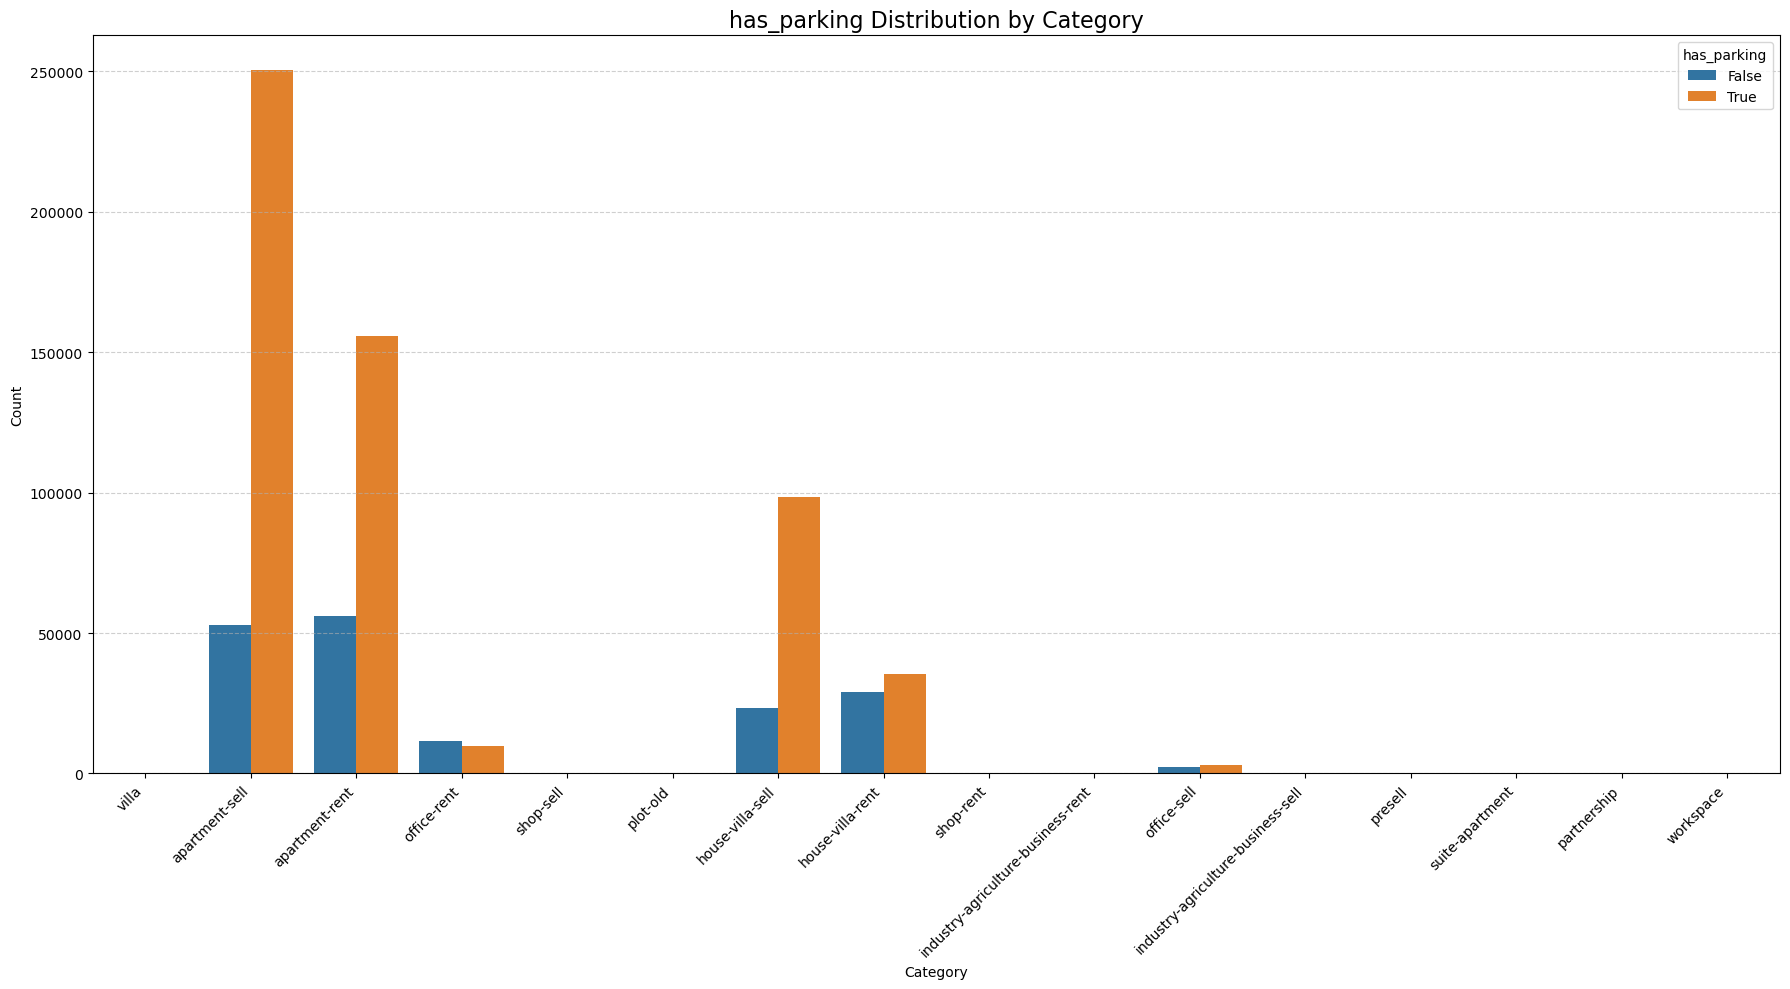

In [53]:
plt.figure(figsize=(18, 10))
sns.countplot(
    data=df_subset,
    x="cat3_slug",
    hue=df_subset["has_parking"].astype("category"),  # force categorical
    palette="tab10"  # or "tab10", "Set2", "Paired" for distinct hues
)
plt.title("has_parking Distribution by Category", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Category")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [45]:
df_subset.has_parking = df_subset.has_parking.map({False:0, True:1})

In [46]:
df_subset.has_parking.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: has_parking
Non-Null Count   Dtype  
--------------   -----  
728156 non-null  float64
dtypes: float64(1)
memory usage: 7.6 MB


In [47]:
df_subset["parking_ai"] = pd.read_csv("parking_ai.csv")["parking_ai"]
parking_ai_mask = ~(df_subset["parking_ai"].isna())
df_subset.loc[parking_ai_mask, "has_parking"] = df_subset.loc[parking_ai_mask, "parking_ai"].values
df_subset.has_parking.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: has_parking
Non-Null Count   Dtype  
--------------   -----  
745420 non-null  float64
dtypes: float64(1)
memory usage: 7.6 MB


In [48]:
print("nan has_parking:")
for item in df_subset.cat3_slug.unique():
    selected_cat = df_subset[df_subset.cat3_slug == item]["has_parking"]
    nan_count = selected_cat.isna().sum()
    if len(selected_cat) > 0:
        print(f"nan count for {item} =  {nan_count} - {nan_count*100 / len(selected_cat)} % ")

del selected_cat

nan has_parking:
nan count for villa =  9138 - 70.84270098457245 % 
nan count for apartment-sell =  2 - 0.000659228373189182 % 
nan count for apartment-rent =  13 - 0.006135548423636021 % 
nan count for office-rent =  68 - 0.31748996171444577 % 
nan count for shop-sell =  20570 - 94.12033859528712 % 
nan count for plot-old =  133569 - 99.99925132889122 % 
nan count for house-villa-sell =  12 - 0.00985601997486715 % 
nan count for house-villa-rent =  9 - 0.013915087046600081 % 
nan count for shop-rent =  43710 - 95.03620116104625 % 
nan count for industry-agriculture-business-rent =  9155 - 100.0 % 
nan count for office-sell =  0 - 0.0 % 
nan count for industry-agriculture-business-sell =  11850 - 99.99156189351109 % 
nan count for presell =  11224 - 71.12350294658133 % 
nan count for suite-apartment =  11131 - 67.60400850288491 % 
nan count for partnership =  3622 - 100.0 % 
nan count for workspace =  506 - 93.87755102040816 % 


In [49]:
df_subset.loc[(df_subset.has_parking.isna()), "has_parking"] = -1

In [50]:
df_subset.has_parking.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: has_parking
Non-Null Count    Dtype  
--------------    -----  
1000000 non-null  float64
dtypes: float64(1)
memory usage: 7.6 MB


In [ ]:
client = OpenAI(api_key="OPENAI_API_KEY")

def extract_parking_batch(texts):
    ads_text = "\n\n".join([f"{i+1}. {t}" for i, t in enumerate(texts)])

    prompt = f"""
    The following texts are Persian real estate ads from various categories (e.g., apartment-sell, villa, office-rent, etc.).
    For each ad, determine whether it **mentions parking**.

    **Rules:**
    1. Return 1 if the ad clearly mentions **having parking** (e.g., "پارکینگ دارد", "با پارکینگ", "دارای پارکینگ").
    2. Return 0 if the ad clearly says **no parking** (e.g., "بدون پارکینگ", "فاقد پارکینگ", "پارکینگ ندارد").
    3. If there is **no mention** or it’s unclear, return null.
    4. Ignore unrelated amenities (like elevator, storage, or yard).
    5. Return only a valid JSON array of 1, 0, or null in the same order as the ads.

    **Examples:**
    - "آپارتمان دو خوابه با آسانسور و پارکینگ" → 1
    - "ویلا دوبلکس بدون پارکینگ" → 0
    - "آپارتمان فاقد پارکینگ" → 0
    - "آپارتمان نوساز با پارکینگ اختصاصی" → 1
    - "خانه حیاط‌دار بدون اشاره به پارکینگ" → null
    - "واحد مبله با آسانسور و انباری" → null

    Now process the following ads:
    {ads_text}

    Return only the JSON array, with no explanations or extra text.
    """

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[{"role": "user", "content": prompt}],
        temperature=0
    )

    raw = response.choices[0].message.content.strip()
    raw_clean = raw.strip('`').replace('json\n', '').strip()

    try:
        results = json.loads(raw_clean)
        if not isinstance(results, list) or len(results) != len(texts):
            raise ValueError("Invalid output format")
    except Exception as e:
        print("Whole null:", e)
        results = [None] * len(texts)

    return results


In [21]:
import tqdm

BATCH_SIZE = 10
rows_to_process = df_subset[parking_mask]

if "parking_ai" not in df_subset.columns:
    df_subset["parking_ai"] = np.nan


for start in tqdm.tqdm(range(0, len(rows_to_process), BATCH_SIZE)):
    batch_rows = rows_to_process.iloc[start:start+BATCH_SIZE]

    texts = [f"{row['title']}. {row['description']}"
        for _, row in batch_rows.iterrows()]
    
    if not texts:
        continue
    
    parking_ai_list = extract_parking_batch(texts)

    for idx, val in zip(batch_rows.index, parking_ai_list):
        if val is None or isinstance(val, list):
            df_subset.loc[idx, "parking_ai"] = np.nan
        else:
            df_subset.loc[idx, "parking_ai"] = val

    parking_ai_list.clear()

  1%|          | 135/11365 [02:48<3:53:10,  1.25s/it]

Whole null: Invalid output format


 15%|█▌        | 1715/11365 [31:43<2:55:49,  1.09s/it]

Whole null: Invalid output format


 17%|█▋        | 1932/11365 [35:23<2:42:30,  1.03s/it]

Whole null: Invalid output format


 22%|██▏       | 2528/11365 [45:17<2:12:56,  1.11it/s]

Whole null: Invalid output format


 29%|██▉       | 3277/11365 [59:07<2:19:53,  1.04s/it]

Whole null: Invalid output format


 30%|██▉       | 3364/11365 [1:00:49<2:10:29,  1.02it/s]

Whole null: Invalid output format


 52%|█████▏    | 5939/11365 [1:43:55<1:13:25,  1.23it/s]

Whole null: Invalid output format


 84%|████████▍ | 9573/11365 [2:47:29<35:41,  1.20s/it]  

Whole null: Invalid output format


100%|██████████| 11365/11365 [3:21:16<00:00,  1.06s/it]


In [22]:
df_subset.parking_ai.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: parking_ai
Non-Null Count  Dtype  
--------------  -----  
17264 non-null  float64
dtypes: float64(1)
memory usage: 7.6 MB


In [23]:
pd.DataFrame.to_csv(df_subset.parking_ai, "E:\\AI_Quera\\Real-estate_PricePrediction\\processed data\\parking_ai.csv")

In [51]:
pd.DataFrame.to_csv(df_subset.has_parking, "E:\\AI_Quera\\Real-estate_PricePrediction\\processed data\\has_parking.csv")

## construction_year

In [99]:
df_subset.construction_year = train_df.construction_year

In [100]:
def persian_to_english(s):
    persian_digits = "۰۱۲۳۴۵۶۷۸۹"
    english_digits = "0123456789"
    trans = str.maketrans(persian_digits, english_digits)
    return str(s).translate(trans)

def clean_year(val):
    if pd.isna(val):  # handle NaN
        return np.nan
    
    val = str(val).strip()
    val = persian_to_english(val)
    
    if "قبل" in val:
        return 1370
    
    match = re.search(r"\b(13\d{2}|14\d{2})\b", val)
    if match:
        return int(match.group(1))
    
    return np.nan

In [101]:
df_subset.construction_year.value_counts()

construction_year
۱۴۰۳           116260
۱۳۹۰            59139
۱۴۰۲            58424
۱۴۰۰            53674
۱۳۹۵            53029
۱۳۹۸            38207
۱۳۹۷            36326
۱۳۹۶            35487
۱۴۰۱            35328
۱۳۸۵            34065
۱۳۹۹            29594
۱۳۹۳            29094
۱۳۹۲            26130
۱۳۹۴            26110
۱۳۸۸            24268
۱۳۸۰            23480
قبل از ۱۳۷۰     20637
۱۳۸۹            16755
۱۳۹۱            16316
۱۳۸۷            14136
۱۳۸۶            13468
۱۳۸۳             9894
۱۳۸۴             8494
۱۳۷۵             7247
۱۳۸۲             6965
۱۳۷۱             5531
۱۳۸۱             3590
۱۳۷۸             3025
۱۳۷۹             2415
۱۳۷۷             2117
۱۳۷۲             1914
۱۳۷۳             1827
۱۳۷۶             1593
۱۳۷۴             1289
Name: count, dtype: int64

In [102]:
df_subset["construction_year"] = df_subset["construction_year"].apply(clean_year)

In [103]:
df_subset["construction_year"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: construction_year
Non-Null Count   Dtype  
--------------   -----  
815828 non-null  float64
dtypes: float64(1)
memory usage: 7.6 MB


In [104]:
df_subset["construction_year"].describe()

count    815828.000000
mean       1393.802468
std           8.275763
min        1370.000000
25%        1390.000000
50%        1395.000000
75%        1401.000000
max        1403.000000
Name: construction_year, dtype: float64

In [105]:
df_subset["year_ai"] = pd.read_csv("year_ai.csv")["year_ai"]
year_ai_mask = ~(df_subset["year_ai"].isna())
df_subset.loc[year_ai_mask, "construction_year"] = df_subset.loc[year_ai_mask, "year_ai"].values
df_subset.construction_year.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: construction_year
Non-Null Count   Dtype  
--------------   -----  
818316 non-null  float64
dtypes: float64(1)
memory usage: 7.6 MB


In [106]:
df_subset.loc[(df_subset["construction_year"] < 1370) & (df_subset["construction_year"] > 1350) , "construction_year"] = 1370
df_subset.loc[df_subset["construction_year"] < 1351, "construction_year"] = np.nan
df_subset.loc[df_subset["construction_year"] > 1403, "construction_year"] = 1403
df_subset["construction_year"].describe()

count    818306.000000
mean       1393.827452
std           8.277082
min        1370.000000
25%        1390.000000
50%        1395.000000
75%        1401.000000
max        1403.000000
Name: construction_year, dtype: float64

In [107]:
df_subset.construction_year.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: construction_year
Non-Null Count   Dtype  
--------------   -----  
818306 non-null  float64
dtypes: float64(1)
memory usage: 7.6 MB


In [108]:
print("nan construction_year:")
for item in df_subset.cat3_slug.unique():
    selected_cat = df_subset[df_subset.cat3_slug == item]["construction_year"]
    nan_count = selected_cat.isna().sum()
    if len(selected_cat) > 0:
        print(f"nan count for {item} =  {nan_count} - {nan_count*100 / len(selected_cat)} % ")

del selected_cat

nan construction_year:
nan count for villa =  12471 - 96.68191332661446 % 
nan count for apartment-sell =  4 - 0.001318456746378364 % 
nan count for apartment-rent =  13 - 0.006135548423636021 % 
nan count for office-rent =  68 - 0.31748996171444577 % 
nan count for shop-sell =  11 - 0.050331731869137496 % 
nan count for plot-old =  133569 - 99.99925132889122 % 
nan count for house-villa-sell =  15 - 0.012320024968583936 % 
nan count for house-villa-rent =  11 - 0.01700732861251121 % 
nan count for shop-rent =  30 - 0.06522731720044354 % 
nan count for industry-agriculture-business-rent =  473 - 5.166575641725833 % 
nan count for office-sell =  0 - 0.0 % 
nan count for industry-agriculture-business-sell =  641 - 5.408826259387394 % 
nan count for presell =  14143 - 89.62042963056841 % 
nan count for suite-apartment =  16087 - 97.7042210750076 % 
nan count for partnership =  3622 - 100.0 % 
nan count for workspace =  535 - 99.25788497217069 % 


In [109]:
df_subset["diff_age"] = np.where(df_subset["construction_year"].notna(), df_subset["construction_year"] - 1370, -1)
df_subset["diff_age"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: diff_age
Non-Null Count    Dtype  
--------------    -----  
1000000 non-null  float64
dtypes: float64(1)
memory usage: 7.6 MB


In [110]:
df_subset["diff_age"].describe()

count    1000000.000000
mean          19.316453
std           12.153592
min           -1.000000
25%           10.000000
50%           23.000000
75%           30.000000
max           33.000000
Name: diff_age, dtype: float64

In [ ]:
import re
import json
from openai import OpenAI

client = OpenAI(api_key="OPENAI_API_KEY")

def extract_construction_year_batch(texts):
    ads_text = "\n\n".join([f"{i+1}. {t}" for i, t in enumerate(texts)])

    prompt = f"""
    The following texts are Persian real estate ads. Extract the CONSTRUCTION YEAR for each ad (in Jalali calendar).

    Rules:
    1. Return exactly one value per ad: the Jalali construction year (integer).
    2. Convert Persian digits or Persian words into Arabic numerals.
    3. If the ad explicitly mentions a Jalali year (e.g., 1398, 1402), return that.
    4. If it says something like "X ساله" or "X سال ساخت", infer the construction year as 1403 - X (current Jalali year = 1403).
    5. Only return Jalali years <= 1404. If it’s Gregorian (>=1500), missing, or unclear, return null.
    6. Ignore unrelated numbers (sizes, floor counts, prices, phone numbers, distances, etc.).
    7. Output must be a JSON array in the same order as the ads, like:
       [1398, null, 1402, 1399]

    Do not include explanations or extra text.

    Examples:
    - "آپارتمان نوساز، سال ساخت 1402" -> 1402
    - "ویلا 5 ساله در شمال" -> 1398   (1403 - 5)
    - "ساختمانه 5 ساله" -> 1398
    - "خانه قدیمی سال ساخت 1375" -> 1375
    - "ویلای 10 سال ساخت" -> 1393
    - "سال ساخت 2017" -> null
    - "زمین فروشی بدون بنا" -> null
    - "آپارتمان 3 ساله در تهران" -> 1400
    - "نوساز یا بازسازی شده" -> 1403
    - "خانه کلنگی" -> 1369
    - "ویلای 1405 متری" -> null

    Now process the following ads:
    {ads_text}
    """

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[{"role": "user", "content": prompt}],
        temperature=0,
    )

    raw = response.choices[0].message.content.strip()
    raw_clean = raw.strip('`').replace('json\n', '')


    try:
        results = json.loads(raw_clean)
        if not isinstance(results, list):
            raise ValueError("Not a list")
    except:
        results = [None] * len(texts)
        print("Whole null")

    return results


persian_numbers = [
    "یک","دو","سه","چهار","پنج","شش","هفت","هشت","نه","ده",
    "یازده","دوازده","سیزده","چهارده","پانزده","شانزده",
    "هفده","هجده","نوزده","بیست","سی","چهل","پنجاه",
    "شصت","هفتاد","هشتاد","نود","صد","یکصد","دویست",
    "سیصد","چهارصد", "هزار"]


digit_pattern = re.compile(r'[\d۰-۹]')

def has_number_info(text: str) -> bool:
    # Check digits
    if digit_pattern.search(text):
        return True
    # Check Persian number words
    for w in persian_numbers:
        if w in text:
            return True
    return False

In [37]:
import tqdm

BATCH_SIZE = 20
rows_to_process = df_subset[year_mask]

if "year_ai" not in df_subset.columns:
    df_subset["year_ai"] = np.nan


for start in tqdm.tqdm(range(0, len(rows_to_process), BATCH_SIZE)):
    batch_rows = rows_to_process.iloc[start:start+BATCH_SIZE]

    mask_batch = batch_rows.apply(
        lambda row: has_number_info(f"{row['title']} {row['description']}"), axis=1)
    batch_rows_filtered = batch_rows[mask_batch]

    texts = [
        f"{row['title']}. {row['description']}"
        for _, row in batch_rows_filtered.iterrows()
    ]
    
    if not texts:
        continue
    
    year_list = extract_construction_year_batch(texts)
    
    for idx, value in zip(batch_rows_filtered.index, year_list):
        if value is None:
            df_subset.loc[idx, "year_ai"] = np.nan
        elif isinstance(value, list):
            df_subset.loc[idx, "year_ai"] = np.nan
        else:
            df_subset.loc[idx, "year_ai"] = value if value > 0 else np.nan

    year_list.clear()

100%|██████████| 2350/2350 [1:00:47<00:00,  1.55s/it]


In [38]:
pd.DataFrame.to_csv(df_subset.year_ai, "E:\\AI_Quera\\Real-estate_PricePrediction\\processed data\\year_ai.csv")
df_subset["year_ai"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: year_ai
Non-Null Count  Dtype  
--------------  -----  
2488 non-null   float64
dtypes: float64(1)
memory usage: 7.6 MB


In [111]:
pd.DataFrame.to_csv(df_subset.diff_age, "E:\\AI_Quera\\Real-estate_PricePrediction\\processed data\\diff_age.csv")

In [907]:
clean_columns = df_subset.drop(["Unnamed: 0", "cat2_slug", "user_type", "description", "title", "rent_mode"], axis=1)

pd.DataFrame.to_csv(clean_columns, "cleaned_23_42.csv")

In [190]:
cols_to_concat = ["Unnamed: 0", "cat3_slug", "has_parking", "diff_age", "has_warehouse", "has_elevator", "rooms_count", "floor"]

df_features = df_subset[cols_to_concat].copy()

df_features.to_csv("E:\\AI_Quera\\Real-estate_PricePrediction\\processed data\\property_features.csv", index=False)

df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Unnamed: 0     1000000 non-null  int64  
 1   cat3_slug      999999 non-null   object 
 2   has_parking    1000000 non-null  float64
 3   diff_age       1000000 non-null  float64
 4   has_warehouse  1000000 non-null  float64
 5   has_elevator   999911 non-null   float64
 6   rooms_count    1000000 non-null  float64
 7   floor          1000000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 61.0+ MB
